#### BST 267: Introduction to Social and Biological Networks (2017)
# Homework 5

In this homework we'll get practice with fixed choice study designs, explore the collision of egocentric samples, and investigate the "friendship paradox" in the context of immunization.

In [19]:
# some imports first
import networkx as nx
import random
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

## Question 1

In the fixed choice design, one typically takes a sample of some number of the individuals in the population of interest, and each person is then asked to nominate up to some fixed number of their contacts as their alters. Treating the network `G` of 1000 nodes below as the true population network, which is unobserved in most situations, choose 200 nodes uniformly at random as egos and have each ego nominate up to 3 alters. Construct a network `H` out of these samples. Make a scatter plot of the degrees of the nodes in `H` (y-axis) vs. the degrees of the nodes in `G` (x-axis). Use `ss.pearsonr` to compute the Pearson linear correlation coefficient between the degrees of nodes in `H` and `G`. Print out the value of this correlation. Are the node degrees in the sample significantly correlated with the node degrees in the underlying population network?

In [20]:
G = nx.barabasi_albert_graph(1000, 3)
    #don't need to track who is ego and who is alter
 #initilize a graph
H = nx.Graph()
#randomly select 200 egos
egos = random.sample(G.nodes(),200)  

#create a list for alters
alters = []
for node in egos:
    #randomly select 3 neighbors from the list of ego nodes
    nominations = random.sample(list(G.neighbors(node)), 3)
    alters.append(nominations)
    for e, a in zip((node, node, node), nominations):
        H.add_edge(e,a)

In [21]:
h = []
g = []
for node in H.nodes():
    h.append(H.degree()[node])
    g.append(G.degree()[node])

Text(0.5,0,'G node degree')

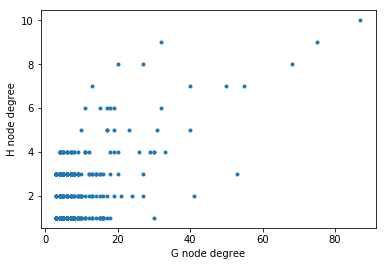

In [22]:
plt.plot(g, h, '.')
plt.ylabel("H node degree")
plt.xlabel("G node degree")

In [23]:
print(ss.pearsonr(g,h))

(0.51607406140847112, 1.3941993470618775e-35)


Based on the results, there does appear to a be a positive correlations between the node degree of Network G and the node degree of Network H. It also appears the node degrees in the sample are significantly correlated with the node degrees in the underyling population/network (p < .001).

## Question 2

Egocentric samples originating from different egos may "collide" if the number of egos that are sampled is large, if the population is small, or both. The Framingham studies on the spread of obesity and smoking by Nicholas Christakis and James Fowler specifically relied on this phenomenon (see e.g. http://www.nejm.org/doi/full/10.1056/NEJMsa066082#t=article). By "collision" we refer to the phenomenon that the egocentric samples originating from different egos end up sharing members of the population. This can happen in two different ways. First, it is possible for a person to be asked to nominate others and at the same time for that person to be nominated by someone else; in this case the person is both an ego and an alter. Second, two egos may nominate the same alter. Using network `G` below, 200 randomly chosen egos and up to 3 alters per ego, answer the following questions using simulation (doing this for a single realization of the sample is sufficient):

(1) What proportion of alters are also egos in the sample?

(2) What proportion of alter nominations (events of an ego choosing or nominating an alter) result in multiple (repeated) nominations of an alter? In other words, these are nominations that lead to the same alter being included in the sample multiple times because they are nominated by more than one ego.

(3) What is the relative size of (proportion of nodes in) the largest connected component in the resulting sampled network?


In [24]:
G = nx.barabasi_albert_graph(2000, 3)

 #initilize a graph
H = nx.Graph()
#randomly select 200 egos
egos = random.sample(G.nodes(),200)  

#create a list for alters
alters = []
for node in egos:
    #randomly select 3 neighbors from the list of ego nodes
    nominations = random.sample(list(G.neighbors(node)),3)
    alters.append(nominations)
    for e, a in zip((node, node, node), nominations):
        H.add_edge(e,a)




In [25]:
common = []
for sublists in alters:
    for node in egos: 
        if node in sublists:
            common.append(node)
            
print(common)

[283, 835, 78, 7, 357, 1450, 1669, 7, 45, 798, 24, 1142, 5, 7, 1087, 915, 626, 103, 1131, 107, 7, 1501, 45, 559, 696, 7, 7, 1957, 981, 83, 1643, 1142, 1036, 1599, 5, 287, 526, 287, 7, 1651, 7, 915, 24, 1612, 7, 665]


In [26]:
print(len(common))
myset = set(common)

46


In [27]:
alters_list = []
for node in alters:
    alters_list.extend(node)
print(len(alters_list))

alters_set = set(alters_list)
print(len(alters_set))

600
445


In [28]:
#(1) What proportion of alters are also egos in the sample?
proportion1 = (len(myset))/(len(alters_set))
print(proportion1)

print("The proportion of alters that are also egos in the sample is", proportion1)

0.07191011235955057
The proportion of alters that are also egos in the sample is 0.07191011235955057


In [29]:
#(2) What proportion of alter nominations (events of an ego choosing or nominating an alter) result in multiple 
#(repeated) nominations of an alter? In other words, these are nominations that lead to the same alter being included 
#in the sample multiple times because they are nominated by more than one ego.

proportion2 = (len(alters_list)-len(alters_set))/(len(alters_list))
print(proportion2)

print("The proportion of alter nominations that result in  multiple nominations of an alter is", proportion2)

0.25833333333333336
The proportion of alter nominations that result in  multiple nominations of an alter is 0.25833333333333336


In [31]:
#(3) What is the relative size of (proportion of nodes in) the largest connected component in the resulting sampled network?
# number of  connected components
print(nx.number_connected_components(H))

largest=[]
Hc = max(nx.connected_component_subgraphs(H), key=len)
largest.append(Hc.number_of_nodes()/nx.number_of_nodes(H))
larger = (Hc.number_of_nodes()/nx.number_of_nodes(G))

print(larger)
print("The relative size of the largest connected component in the resulting sampled network is", larger)

37
0.199
The relative size of the largest connected component in the resulting sampled network is 0.199


## Question 3

The term "friendship paradox" is sometimes used to refer to the idea that your friends have on average more friends than you do. Formulated in terms of networks, this is analogous to stating that the mean degree of the neighbors of a randomly chosen node is, on average, higher than the degree of the node itself. Here we consider a variant of this idea by contructing two cohorts, where one of the cohorts makes use of the "friendship paradox." Cohort A, the "ego cohort," consists of a random sample of 500 nodes from the network. Cohort B, the "alter cohort," also consists of 500 nodes, but its nodes are chosen in the following way: for each node in Cohort A, we select one of its network neighbors uniformly at random for inclusion in Cohort B. For example, if node 15 belongs to Cohort A, we would pick the corresponding node in Cohort B by finding the network neighbors of node 15, say nodes 20, 22, and 24, and then choosing one of these nodes (20, 22, 24) to be included in Cohort B. Note that it is possible for the same alter to be chosen by several egos, and therefore Cohort B may not have exactly 500 nodes. The network structure of the population is given by network `G` below.

Construct these two cohorts and print out the average degree of nodes in each cohort. Explain the results in the context of the friendship paradox. Finally, consider an immunization campaign that targets everyone in either Cohort A or Cohort B; assuming that the network ties accurately reflect potential pathways for the pathogen to spread, which cohort results in more effective immunization of the population and why?

In [32]:
G = nx.barabasi_albert_graph(10000, 3)


#randomly select 500 nodes
cohortA = random.sample(G.nodes(),500) 

#Create cohort B, from cohortA
cohortB = []
for node in cohortA:
    #randomly uniform select 1 neighbor from the list of CohortA nodes
    nominations = random.choice(list(G.neighbors(node)))
    cohortB.append(nominations)


In [33]:
CohortB_set = set(cohortB)
print(len(CohortB_set))

467


In [34]:
#refer back to the original Graph G to get the neighbor degrees
cohortA_degrees = []
for node in cohortA:
    cohortA_degrees.append(G.degree(node))


cohortB_degrees = []
for node in CohortB_set:
    cohortB_degrees.append(G.degree(node))

print("The mean degree of nodes in Cohort A is", np.mean(cohortA_degrees),
      ". The mean degree of nodes in Cohort B is", np.mean(cohortB_degrees))

The mean degree of nodes in Cohort A is 5.898 . The mean degree of nodes in Cohort B is 14.0042826552


Since the average degree of nodes in Cohort B is higher than the average degree of nodes in Cohort A, the immunization would be more effective if focused on the individuals in Cohort B. Because the average degree of connectivity is higher, the effects of the immunization efforts can move more rapidly through the network. 